# Data preparation
##### 1. Load the data from EDA
##### 2. Normalize
##### 3. Set up a Data pipeline, do shuffle, split the data into training, testing, split up into batches

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [3]:
#load data
df = pd.read_csv('/content/sample_data/CreditCard_EDA_balanced6636.csv')
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,9.446729,31,-1,-1,-1,-1,-1,-1,4.856966,5.725109,...,0,0,1,0,0,0,0,0,1,0
1,8.987197,35,-2,-2,-2,-2,-2,-2,5.191289,5.504654,...,0,1,0,0,0,0,0,1,0,0
2,7.418581,23,-1,-1,-2,-2,-2,-2,4.353284,0.000000,...,1,0,0,0,0,0,0,0,1,0
3,9.305651,32,0,0,0,0,0,0,8.598202,8.525856,...,1,0,0,0,0,0,0,0,1,0
4,7.888585,35,-1,-1,-1,-1,-1,0,4.567814,5.788532,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
df.columns

In [ ]:
df[['default.payment.next.month']].values.shape
df[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3']].values.shape

(13272, 33)

In [25]:
#Normalization, Pouring data into pipeline, shuffle, split the training, evaluating, and testing data, split the dataset into batches

X = df[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3']].values
y = np.squeeze(df[['default.payment.next.month']].values)
print(X.shape, y.shape)

# Normalize the input features using Z-score normalization
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

print(X[0])
print(X_normalized[0])
print(y[0:5])


(13272, 33) (13272,)
[ 9.44672915 31.         -1.         -1.         -1.         -1.
 -1.         -1.          4.85696598  5.72510899  6.22502037  5.9177283
  6.03092562  6.12249281  5.73009978  6.23002202  5.92265023  6.03172638
  6.12745126  6.40031281  0.          1.          0.          0.
  0.          1.          0.          0.          0.          0.
  0.          1.          0.        ]
[ 1.34046716 -0.49059068 -0.97329516 -0.80112701 -0.76655653 -0.72206122
 -0.68971224 -0.65954396 -0.40523466 -0.01855997  0.19718281  0.12348441
  0.21222476  0.2857089   0.99726323  1.2382585   1.18040457  1.29258012
  1.32820307  1.4538196  -0.83627734  0.83627734 -0.02297182 -0.71322938
 -0.95735798  2.18700858 -0.05358537 -0.08216519 -0.03980937 -0.03363745
 -0.92996273  0.95303066 -0.10583005]
[0 0 0 0 0]


In [26]:
# Create a TensorFlow Dataset from the normalized input features and target labels
dataset = tf.data.Dataset.from_tensor_slices((X_normalized, y))

# Shuffle the dataset
dataset = dataset.shuffle(buffer_size=len(X_normalized))

# Split the data into train, validation, and test sets
train_size = int(0.8 * len(X_normalized))
val_size = int(0.1 * len(X_normalized))
test_size = int(0.1 * len(X_normalized))

# Split the dataset into train, validation, and test sets
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(train_size + val_size).take(test_size)

# Batch the datasets
batch_size = 8
train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

it = train_dataset.as_numpy_iterator()
print(it.next()[0].shape, it.next()[1].shape) #return a batch (X,y)
print(it.next()[0], it.next()[1]) #return a batch (X,y)
# for features, labels in train_dataset:
#   print("Train Features shape:", features.shape)
#   print("Train Labels shape:", labels.shape)

(8, 33) (8,)
[[-0.27038186 -1.23311841 -0.18313285 -0.05935516 -0.0206266   0.03454675
   0.08597294  0.11209457  0.78646172  0.78959877  0.75142352  0.36774802
   0.10712208  0.14848387  0.61024393  0.4523554   0.363562    0.13293735
  -0.22450466  1.49952288 -0.83627734  0.83627734 -0.02297182 -0.71322938
   1.04454136 -0.45724558 -0.05358537 -0.08216519 -0.03980937 -0.03363745
  -0.92996273  0.95303066 -0.10583005]
 [ 1.53798486 -1.02096763 -0.97329516 -0.80112701 -0.76655653 -0.72206122
  -0.68971224 -0.65954396  0.21914949  0.20019975  0.30543996  0.08103102
   0.16062629  0.43992296  1.26379825  1.37270295  1.12924932  1.28866701
   1.53985236  1.33639435 -0.83627734  0.83627734 -0.02297182  1.40207348
  -0.95735798 -0.45724558 -0.05358537 -0.08216519 -0.03980937 -0.03363745
  -0.92996273  0.95303066 -0.10583005]
 [-1.28438776  1.84306788 -0.18313285 -0.05935516 -0.0206266   0.03454675
   1.63734331  0.11209457  0.26607945  0.31023489  0.36049008  0.42122796
   0.45663157  0.5004

# Modeling


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

In [28]:
tf.keras.backend.clear_session()

In [29]:
model = Sequential()

In [30]:
it = train_dataset.as_numpy_iterator()
print(it.next()[0].shape, it.next()[1].shape) #return a batch (X,y)
input_shape = it.next()[0].shape
input_shape[1]

(8, 33) (8,)


33

In [31]:
# a binary classification, taking signoid as the output activation function
# Don't need an input layer since it's sequential

model.add(Dense(256, input_shape=(input_shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

#optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer= tf.keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [32]:
input_shape = (8, 33)
model.build(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               8704      
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 28,978
Trainable params: 28,978
Non-traina

In [33]:
hist = model.fit(train_dataset, epochs=200, validation_data=val_dataset) #shuffle after every epochs = True

#learning rate 0.001, batch size 16
#100 epoch, accuracy:0.9, val_accuracy:0.9, no overfitting
#130 0.91 / 0.91
#150 0.915/0.91
#170 0.925 / 0.925 testing 0.93
#190 0.926 / 0.93 testing 0.93

#batch size 16->8, learning rate 0.001->0.0001. more precise.
#200 epochs, 0.936/0.938/0.94


Epoch 1/200
1328/1328 [==============================] - 8s 4ms/step - loss: 0.6076 - accuracy: 0.6669 - val_loss: 0.5749 - val_accuracy: 0.7114
Epoch 2/200
1328/1328 [==============================] - 5s 4ms/step - loss: 0.5743 - accuracy: 0.7025 - val_loss: 0.5727 - val_accuracy: 0.7061
Epoch 3/200
1328/1328 [==============================] - 6s 4ms/step - loss: 0.5645 - accuracy: 0.7109 - val_loss: 0.5538 - val_accuracy: 0.7129
Epoch 4/200
1328/1328 [==============================] - 8s 6ms/step - loss: 0.5592 - accuracy: 0.7130 - val_loss: 0.5562 - val_accuracy: 0.7182
Epoch 5/200
1328/1328 [==============================] - 5s 4ms/step - loss: 0.5578 - accuracy: 0.7134 - val_loss: 0.5484 - val_accuracy: 0.7204
Epoch 6/200
1328/1328 [==============================] - 5s 4ms/step - loss: 0.5536 - accuracy: 0.7231 - val_loss: 0.5308 - val_accuracy: 0.7362
Epoch 7/200
1328/1328 [==============================] - 6s 4ms/step - loss: 0.5483 - accuracy: 0.7230 - val_loss: 0.5305 - val_ac

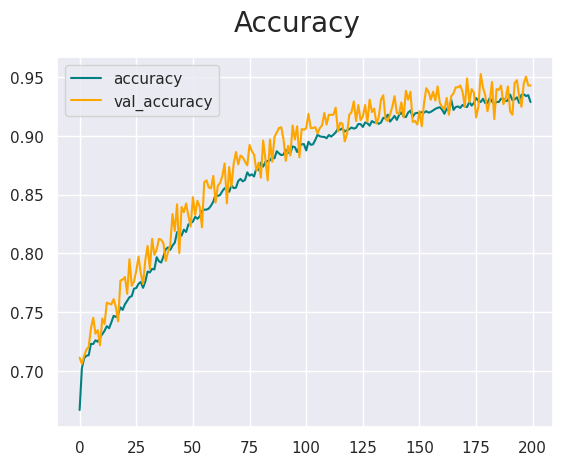

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [35]:
test_accuracy = model.evaluate(test_dataset,verbose=0,return_dict=True)['accuracy']
test_accuracy

0.9359457492828369

In [ ]:
#Is any other way to further boost the accuracy?
#Provide more data
#Cross Validation
#combine training and valuating data set.

# Evaluation
##### https://www.kaggle.com/code/jcontr/meta-learning-credit-card-default
##### 1. Is the data unbalanced on the feature of whether default?
##### 2. Do we need to reduce the dimensions? 33 features and most of them are generated by one hot encoding and they're sparse.

Bias sanity check:
1. Historical bias / representation bias / measurement bias
2. Learning bias
3. Evaluation bias
4. Aggregation bias
5. Deployment bias


In [36]:
model.evaluate(test_dataset,verbose=0,return_dict=True)

{'loss': 0.13483712077140808, 'accuracy': 0.941974401473999}

In [37]:
test_prediction = model.predict(test_dataset)
print(test_prediction.shape)
test_prediction
#3000 probabilities

166/166 [==============================] - 0s 2ms/step
(1327, 2)


array([[4.5901662e-01, 5.4098344e-01],
       [9.9967444e-01, 3.2560248e-04],
       [3.8381550e-01, 6.1618453e-01],
       ...,
       [4.3238398e-01, 5.6761605e-01],
       [4.4271013e-01, 5.5728990e-01],
       [7.1275174e-03, 9.9287248e-01]], dtype=float32)

In [38]:
y_test_true = []
y_test_predicted = []
x_features = []


#expand true label y in test_dataset and save it in the list. Make prediction by batches and save it in the list
#Must do the prediction and expanding under same for loop otherwise the sequence may be messed up.
#Try sigmoid?

for test_features, y_test in test_dataset:
  x_features.extend(test_features.numpy())
  predictions = model.predict(test_features, verbose=0)
  y_test_predicted.extend(np.argmax(predictions, axis=1).tolist())
  y_test_true.extend(y_test.numpy())

print(f"True label    : {y_test_true[0:5]}")
print(f"Predicted label: {y_test_predicted[0:5]}")
print(x_features[0:5])

correct_predictions = sum(np.array(y_test_predicted) == np.array(y_test_true))
total_samples = len(y_test_true)
accuracy = correct_predictions / total_samples
print("Manual Accuracy:", accuracy)

True label    : [1, 0, 1, 0, 0]
Predicted label: [1, 0, 1, 0, 0]
[array([ 0.56797816,  0.25193704,  1.39719175,  1.42418853,  1.47123326,
        0.03454675,  0.08597294,  0.11209457,  0.93295357,  0.97134838,
        0.98845645,  1.01928391,  1.05847497,  0.98749912,  1.12191573,
        0.72312004,  0.73116804,  0.63745727,  0.86683094,  0.46757122,
        1.19577555, -1.19577555, -0.02297182,  1.40207348, -0.95735798,
       -0.45724558, -0.05358537, -0.08216519, -0.03980937, -0.03363745,
       -0.92996273,  0.95303066, -0.10583005]), array([ 0.23154831, -1.02096763, -0.97329516, -0.80112701, -0.76655653,
       -0.72206122, -0.68971224, -0.65954396, -0.90333962, -0.7708923 ,
       -0.74965727, -0.55001174, -1.14594723, -0.55108035,  0.08820929,
        0.06512782,  0.34265269, -0.42150102,  0.24529547,  0.70114531,
       -0.83627734,  0.83627734, -0.02297182,  1.40207348, -0.95735798,
       -0.45724558, -0.05358537, -0.08216519, -0.03980937, -0.03363745,
       -0.92996273,  0

In [ ]:
"""
Have no idea why the test accuracy by model.eval and model.predict + threshold is so different?
Must do the prediction and expanding under same for loop otherwise the sequence may be messed up.?
"""

# #get the prediction result
# train_prediction_binary = []
# for prediction in train_prediction:
#   #print(prediction)
#   if prediction >= 0.5: #take 0.5 as threshold, default of model.evaluation is also 0.5
#     train_prediction_binary.append(1)
#   else:
#     train_prediction_binary.append(0)
# print(len(train_prediction_binary))
# print(train_prediction_binary[0:20])

# #get y_test, take y_test out from data pipeline and put it into a list
# y_train_all = []
# for train_features, y_train in train_dataset:
#   y_train_all.extend(y_train.numpy())
# print(len(y_train_all))
# print(y_train_all[0:20])

# correct_predictions = sum(np.array(train_prediction_binary) == np.array(y_train_all))
# total_samples = len(y_train_all)
# accuracy = correct_predictions / total_samples

# print("Manual Accuracy with Threshold 0.5:", accuracy)

'\nHave no idea why the test accuracy by model.eval and model.predict + threshold is so different?\nMust do the prediction and expanding under same for loop otherwise the sequence may be messed up.?\n'

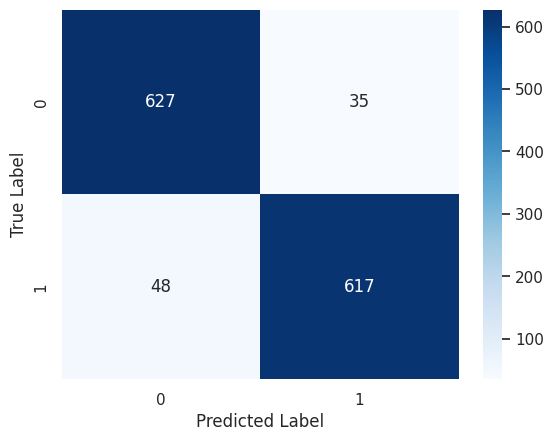

[[627  35]
 [ 48 617]]


In [40]:
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test_true, y_test_predicted)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues')
# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()
print(confusion_matrix.numpy())

We have
1. 30000 (23364+6636) examples, 90% of accuracy, 100 epochs, 74% of recall.
2. 22636 (16000+6636) examples, 90% of accuracy, 100 epochs, 78% of recall. [[1560   58]
 [ 137  508]]
3. 16636 (10000+6636) examples, 89.7% of accuracy, 100 epochs, 84% of recall.
[[932  65]
 [105 561]]
4. 13272 (6636+6636) examples, 89.5% of accuracy, 100 epochs, 86% of recall.
[[651  33]
 [ 86 557]]
4. 13272 (6636+6636) examples, 93% of accuracy, 200 epochs, 94% of recall.
[[600  46]
 [ 38 643]]


# Unfairness/Bias check

In [42]:
#raw data incorperates male: 5462 and female: 7810. The gender rate is: 41% (41% male, 59% female)

male_fp = 0
female_fp = 0
male_fn = 0
female_fn = 0

for i in range(len(y_test_true)):
  #false positive
  if y_test_predicted[i] == 1 and y_test_true[i] == 0:
    if x_features[i][-13] >= 0: #-13 index of male
      male_fp+=1
    else:
      female_fp+=1
  #false negative
  if y_test_predicted[i] == 0 and y_test_true[i] == 1:
    if x_features[i][-13] >= 0: #-13 index of male
      male_fn+=1
    else:
      female_fn+=1

print(f"False positive, male:{male_fp}, female:{female_fp} and the gender rate is {round(male_fp/(female_fp+male_fp),1)}")
print(f"False negative, male:{male_fn}, female:{female_fn} and the gender rate is {round(male_fn/(female_fn+male_fn),1)}")

"""
False positive means the model mispredicts the credit card owner's default and among 12 examples, there are 5 males and 7 females with the gender rate 0.4
which makes sense and agrees with the gender rate

False negative means the model can't tell the credit card owner's default and among 74 examples, there are 35 males and 39 females with the gender rate 0.5
which is slightly higher than the overall gender rate and implies the model has more possibility of missing the prediction on males.
"""

False positive, male:16, female:19 and the gender rate is 0.5
False negative, male:15, female:33 and the gender rate is 0.3


"\nFalse positive means the model mispredicts the credit card owner's default and among 12 examples, there are 5 males and 7 females with the gender rate 0.4\nwhich makes sense and agrees with the gender rate\n\nFalse negative means the model can't tell the credit card owner's default and among 74 examples, there are 35 males and 39 females with the gender rate 0.5\nwhich is slightly higher than the overall gender rate and implies the model has more possibility of missing the prediction on males.\n"

# Feature reduction
Try different combinations of features.
1. Removing collinear  features may help to boost the performance
2. Some setups may have business meaning except for the model training purpose.

In [ ]:
#Removing collinear features may make us lose some information under these columns.
#Know whether default or not 6 months ahead.
#Remove features that contain less data

X_reduced_2 = df[['LIMIT_BAL', 'AGE', 'PAY_6','BILL_AMT6','PAY_AMT6',
       'SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3','MARRIAGE_1', 'MARRIAGE_2']].values
y = np.squeeze(df[['default.payment.next.month']].values)

# Normalize the input features using Z-score normalization
scaler = StandardScaler()
X_reduced_normalized = scaler.fit_transform(X_reduced_2)

In [ ]:
# Create a TensorFlow Dataset from the normalized input features and target labels
dataset_r = tf.data.Dataset.from_tensor_slices((X_reduced_normalized, y))

# Shuffle the dataset
dataset_r = dataset_r.shuffle(buffer_size=len(X_reduced_normalized))

# Split the data into train, validation, and test sets
train_size = int(0.8 * len(X_reduced_normalized))
val_size = int(0.1 * len(X_reduced_normalized))
test_size = int(0.1 * len(X_reduced_normalized))

# Split the dataset into train, validation, and test sets
train_dataset_r = dataset_r.take(train_size)
val_dataset_r = dataset_r.skip(train_size).take(val_size)
test_dataset_r = dataset_r.skip(train_size + val_size).take(test_size)

# Batch the datasets
batch_size = 8
train_dataset_r = train_dataset_r.batch(batch_size)
val_dataset_r = val_dataset_r.batch(batch_size)
test_dataset_r = test_dataset_r.batch(batch_size)

it = train_dataset_r.as_numpy_iterator()
print(it.next()[0].shape, it.next()[1].shape) #return a batch (X,y)
print(it.next()[0], it.next()[1]) #return a batch (X,y)
# for features, labels in train_dataset:
#   print("Train Features shape:", features.shape)
#   print("Train Labels shape:", labels.shape)

(8, 13) (8,)
[[ 0.50888635  0.6762386   0.11209457  1.04008101  0.83100655  1.19577555
  -1.19577555 -0.02297182 -0.71322938  1.04454136 -0.45724558  1.07531191
  -1.04928419]
 [ 0.56797816 -1.23311841  1.65537162  0.99691759 -1.41461444 -0.83627734
   0.83627734 -0.02297182 -0.71322938  1.04454136 -0.45724558 -0.92996273
   0.95303066]
 [ 0.37948955 -0.80881685 -0.65954396 -0.92347209 -1.41461444 -0.83627734
   0.83627734 -0.02297182  1.40207348 -0.95735798 -0.45724558 -0.92996273
   0.95303066]
 [-0.75628341 -0.17236452  1.65537162  0.49224564  0.17017021  1.19577555
  -1.19577555 -0.02297182  1.40207348 -0.95735798 -0.45724558 -0.92996273
   0.95303066]
 [-0.75628341 -1.23311841  0.11209457  0.38454203  0.00969685 -0.83627734
   0.83627734 -0.02297182  1.40207348 -0.95735798 -0.45724558  1.07531191
  -1.04928419]
 [-1.28438776 -1.3391938  -0.65954396 -1.2479112  -0.38266278 -0.83627734
   0.83627734 -0.02297182 -0.71322938 -0.95735798  2.18700858 -0.92996273
   0.95303066]
 [ 0.4462

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_2 = Sequential()

In [ ]:
it = train_dataset_r.as_numpy_iterator()
print(it.next()[0].shape, it.next()[1].shape) #return a batch (X,y)
input_shape = it.next()[0].shape
input_shape[1]

(8, 13) (8,)


13

In [ ]:
# a binary classification, taking signoid as the output activation function
# Don't need an input layer since it's sequential

model_2.add(Dense(256, input_shape=(input_shape[1],), activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(2, activation='softmax'))

#optimizer = Adam(learning_rate=0.00001)
model_2.compile(optimizer= tf.keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model_2.fit(train_dataset_r, epochs=200, validation_data=val_dataset_r)

Epoch 1/200
1328/1328 [==============================] - 8s 4ms/step - loss: 0.6626 - accuracy: 0.6037 - val_loss: 0.6386 - val_accuracy: 0.6066
Epoch 2/200
1328/1328 [==============================] - 6s 5ms/step - loss: 0.6401 - accuracy: 0.6248 - val_loss: 0.6342 - val_accuracy: 0.6307
Epoch 3/200
1328/1328 [==============================] - 6s 4ms/step - loss: 0.6368 - accuracy: 0.6305 - val_loss: 0.6299 - val_accuracy: 0.6292
Epoch 4/200
1328/1328 [==============================] - 5s 4ms/step - loss: 0.6361 - accuracy: 0.6260 - val_loss: 0.6272 - val_accuracy: 0.6466
Epoch 5/200
1328/1328 [==============================] - 6s 4ms/step - loss: 0.6346 - accuracy: 0.6292 - val_loss: 0.6297 - val_accuracy: 0.6428
Epoch 6/200
1328/1328 [==============================] - 5s 4ms/step - loss: 0.6340 - accuracy: 0.6321 - val_loss: 0.6260 - val_accuracy: 0.6353
Epoch 7/200
1328/1328 [==============================] - 6s 4ms/step - loss: 0.6315 - accuracy: 0.6345 - val_loss: 0.6286 - val_ac

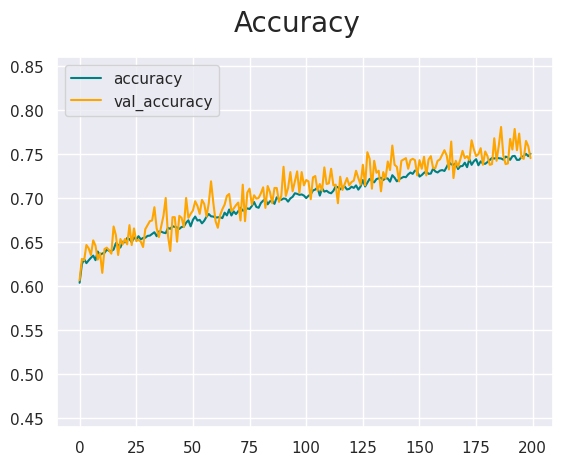

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.ylim(0.44, 0.86)
plt.show()
##didn't increase the accuracy

In [ ]:
test_accuracy = model_2.evaluate(test_dataset_r,verbose=0,return_dict=True)['accuracy']
test_accuracy

0.7430294156074524

In [ ]:
y_test_true = []
y_test_predicted = []
x_features = []

#expand true label y in test_dataset and save it in the list. Make prediction by batches and save it in the list
#Must do the prediction and expanding under same for loop otherwise the sequence may be messed up.
#Try sigmoid?

for test_features, y_test in test_dataset_r:
  x_features.extend(test_features.numpy())
  predictions = model_2.predict(test_features, verbose=0)
  y_test_predicted.extend(np.argmax(predictions, axis=1).tolist())
  y_test_true.extend(y_test.numpy())
print(f"True label    : {y_test_true[0:20]}")
print(f"Predicted label: {y_test_predicted[0:20]}")

correct_predictions = sum(np.array(y_test_predicted) == np.array(y_test_true))
total_samples = len(y_test_true)
accuracy = correct_predictions / total_samples
print("Manual Accuracy:", accuracy)

True label    : [1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0]
Predicted label: [1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0]
Manual Accuracy: 0.7641296156744537


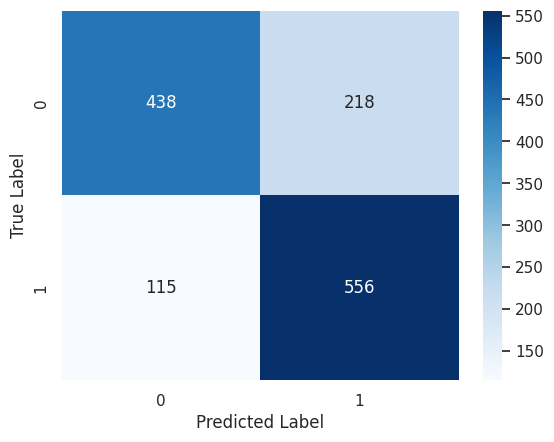

[[438 218]
 [115 556]]


In [ ]:
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test_true, y_test_predicted)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues')
# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()
print(confusion_matrix.numpy())

1. model2(13features,6months prior), 13272 (6636+6636) examples, 71.3% of accuracy, 100 epochs, 66.7% of recall, and 73% of precision.
[[499 163]
 [221 444]]
2. model2(13feature,6months prior), 13272 (6636+6636) examples, 75% of accuracy, 200 epochs, 75% of recall, and 78% of precision .
[[524 138]
 [165 500]]

In [ ]:
#raw data incorperates male: 5462 and female: 7810. The gender rate is: 41% (41% male, 59% female)

male_fp = 0
female_fp = 0
male_fn = 0
female_fn = 0

for i in range(len(y_test_true)):
  #false positive
  if y_test_predicted[i] == 1 and y_test_true[i] == 0:
    if x_features[i][-13] >= 0: #-13 index of male
      male_fp+=1
    else:
      female_fp+=1
  #false negative
  if y_test_predicted[i] == 0 and y_test_true[i] == 1:
    if x_features[i][-13] >= 0: #-13 index of male
      male_fn+=1
    else:
      female_fn+=1

print(f"False positive, male:{male_fp}, female:{female_fp} and the gender rate is {round(male_fp/(female_fp+male_fp),1)}")
print(f"False negative, male:{male_fn}, female:{female_fn} and the gender rate is {round(male_fn/(female_fn+male_fn),1)}")



False positive, male:96, female:126 and the gender rate is 0.4
False negative, male:70, female:21 and the gender rate is 0.8


Now, our first model can predict whether a specific credit card owner will default or not based on his/her long-term repayment status (6 months) and the predicting accuracy is 93% and recall is 94% which means we can 94% surely identify the potential default. Also, we have another model that can make predictions six months ahead and the accuracy, recall and precision are 71.3%, 75%, and 78%. That is, if our model can 78% surely make a prediction of a specific credit card owner will default 6 months after. For a real-world scenario, we can send out a warning message six months ahead and a forecast a month ahead that can help the bank to get prepared.



### Remove all the features related to personal information
##### Try to make prediction based on their payment status instead of who they are to block all the potential bias.

In [4]:
#Removing categorical features (Gender, Education, Marriage)

X_reduced_3 = df[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
          'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
          'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
          'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values

y = np.squeeze(df[['default.payment.next.month']].values)

# Normalize the input features using Z-score normalization
scaler = StandardScaler()
X_reduced_normalized = scaler.fit_transform(X_reduced_3)

In [5]:
# Create a TensorFlow Dataset from the normalized input features and target labels
dataset_r = tf.data.Dataset.from_tensor_slices((X_reduced_normalized, y))

# Shuffle the dataset
dataset_r = dataset_r.shuffle(buffer_size=len(X_reduced_normalized))

# Split the data into train, validation, and test sets
train_size = int(0.8 * len(X_reduced_normalized))
val_size = int(0.1 * len(X_reduced_normalized))
test_size = int(0.1 * len(X_reduced_normalized))

# Split the dataset into train, validation, and test sets
train_dataset_r = dataset_r.take(train_size)
val_dataset_r = dataset_r.skip(train_size).take(val_size)
test_dataset_r = dataset_r.skip(train_size + val_size).take(test_size)

# Batch the datasets
batch_size = 8
train_dataset_r = train_dataset_r.batch(batch_size)
val_dataset_r = val_dataset_r.batch(batch_size)
test_dataset_r = test_dataset_r.batch(batch_size)

it = train_dataset_r.as_numpy_iterator()
print(it.next()[0].shape, it.next()[1].shape) #return a batch (X,y)
print(it.next()[0], it.next()[1]) #return a batch (X,y)
# for features, labels in train_dataset:
#   print("Train Features shape:", features.shape)
#   print("Train Labels shape:", labels.shape)

(8, 20) (8,)
[[-1.70356777 -0.59666607  0.60702945  1.42418853  1.47123326  1.54776269
   1.63734331  0.11209457 -0.17647147 -0.04276173 -0.02621584  0.08502177
   0.1218799   0.19464322  0.2898353  -1.64257496  0.3569447  -1.47739263
   0.13269105 -0.25710599]
 [-0.40842996  1.31269094 -0.18313285 -0.05935516 -0.0206266   0.03454675
   0.08597294  0.11209457  0.25933697  0.31477069  0.36009131  0.4098952
   0.36717572  0.41360453  0.2898353   0.29941672  0.25967061  0.13293735
   0.13269105  0.15692281]
 [ 0.77543656 -0.38451529 -0.97329516 -0.80112701 -0.0206266  -0.72206122
  -0.68971224 -0.65954396  0.09239619  0.48599829  0.44089695  0.51010503
  -0.26958218  0.59165056  1.60839415  1.08771174  1.65776845  0.68427832
   1.72104027  2.37149835]
 [ 0.37948955 -0.59666607 -0.18313285 -0.05935516 -0.0206266   0.03454675
   0.08597294  0.11209457  1.04220081  1.04566555  1.03774799  1.06390923
   1.10503222  1.13907227  0.75912766  0.74125614  0.82007862  0.89880472
   1.22231746 -1.41

In [6]:
tf.keras.backend.clear_session()

In [10]:
model_3 = Sequential()

In [11]:
it = train_dataset_r.as_numpy_iterator()
print(it.next()[0].shape, it.next()[1].shape) #return a batch (X,y)
input_shape = it.next()[0].shape
input_shape[1]

(8, 20) (8,)


20

In [13]:
# a binary classification, taking signoid as the output activation function
# Don't need an input layer since it's sequential

model_3.add(Dense(256, input_shape=(input_shape[1],), activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(16, activation='relu'))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(2, activation='softmax'))

#optimizer = Adam(learning_rate=0.00001)
model_3.compile(optimizer= tf.keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
hist = model_3.fit(train_dataset_r, epochs=200, validation_data=val_dataset_r)

Epoch 1/200
1328/1328 [==============================] - 13s 4ms/step - loss: 0.6016 - accuracy: 0.6831 - val_loss: 0.5793 - val_accuracy: 0.7167
Epoch 2/200
1328/1328 [==============================] - 6s 4ms/step - loss: 0.5752 - accuracy: 0.7024 - val_loss: 0.5487 - val_accuracy: 0.7197
Epoch 3/200
1328/1328 [==============================] - 7s 5ms/step - loss: 0.5695 - accuracy: 0.7102 - val_loss: 0.5501 - val_accuracy: 0.7227
Epoch 4/200
1328/1328 [==============================] - 5s 4ms/step - loss: 0.5658 - accuracy: 0.7165 - val_loss: 0.5751 - val_accuracy: 0.7114
Epoch 5/200
1328/1328 [==============================] - 5s 4ms/step - loss: 0.5614 - accuracy: 0.7167 - val_loss: 0.5621 - val_accuracy: 0.7091
Epoch 6/200
1328/1328 [==============================] - 5s 4ms/step - loss: 0.5601 - accuracy: 0.7162 - val_loss: 0.5731 - val_accuracy: 0.7008
Epoch 7/200
1328/1328 [==============================] - 6s 4ms/step - loss: 0.5569 - accuracy: 0.7206 - val_loss: 0.5328 - val_a

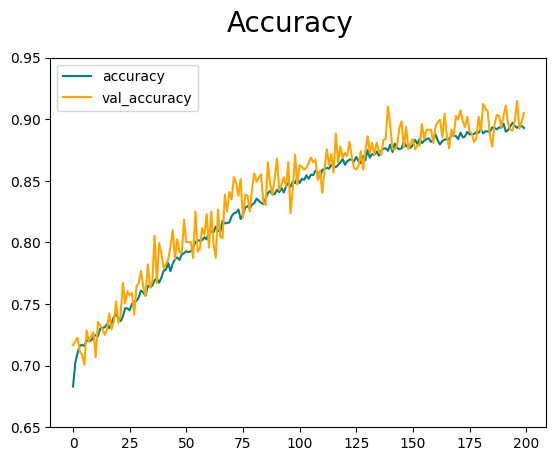

In [20]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.ylim(0.65, 0.95)
plt.show()

In [21]:
test_accuracy = model_3.evaluate(test_dataset_r,verbose=0,return_dict=True)['accuracy']
test_accuracy

0.9095704555511475

In [23]:
y_test_true = []
y_test_predicted = []
x_features = []


for test_features, y_test in test_dataset_r:
  x_features.extend(test_features.numpy())
  predictions = model_3.predict(test_features, verbose=0)
  y_test_predicted.extend(np.argmax(predictions, axis=1).tolist())
  y_test_true.extend(y_test.numpy())
print(f"True label    : {y_test_true[0:20]}")
print(f"Predicted label: {y_test_predicted[0:20]}")

correct_predictions = sum(np.array(y_test_predicted) == np.array(y_test_true))
total_samples = len(y_test_true)
accuracy = correct_predictions / total_samples
print("Manual Accuracy:", accuracy)

True label    : [1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1]
Predicted label: [1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1]
Manual Accuracy: 0.9193669932177845


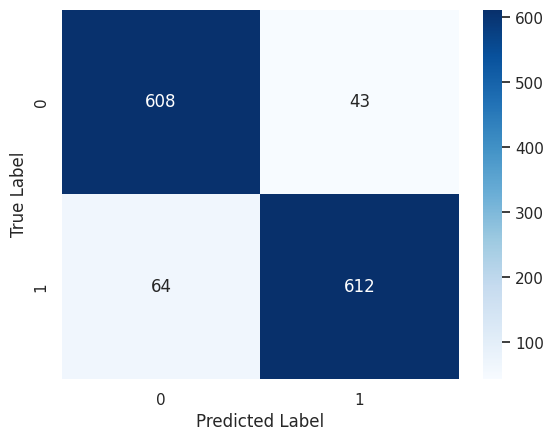

[[608  43]
 [ 64 612]]


In [24]:
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test_true, y_test_predicted)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues')
# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()
print(confusion_matrix.numpy())

If we toss away any personal information that can cause bias and only train the model through the payment status, we can still get a decent test accuracy of 90%, recall of 90% and precision 90%